**Bankruptcy prediction is the task of predicting bankruptcy and various measures of financial distress of firms, and is important due to the relevance for creditors and investors in evaluating the likelihood that a firm may go bankrupt.**

In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the Dataset into a Dataframe
df = pd.read_csv("data.csv")

In [3]:
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


# Features

- Y - Bankrupt?: Class label
- X1 - ROA(C) before interest and depreciation before interest: Return On Total Assets(C)
- X2 - ROA(A) before interest and % after tax: Return On Total Assets(A)
- X3 - ROA(B) before interest and depreciation after tax: Return On Total Assets(B)
- X4 - Operating Gross Margin: Gross Profit/Net Sales
- X5 - Realized Sales Gross Margin: Realized Gross Profit/Net Sales
- X6 - Operating Profit Rate: Operating Income/Net Sales
- X7 - Pre-tax net Interest Rate: Pre-Tax Income/Net Sales
- X8 - After-tax net Interest Rate: Net Income/Net Sales
- X9 - Non-industry income and expenditure/revenue: Net Non-operating Income Ratio
- X10 - Continuous interest rate (after tax): Net Income-Exclude Disposal Gain or Loss/Net Sales
- X11 - Operating Expense Rate: Operating Expenses/Net Sales
- X12 - Research and development expense rate: (Research and Development Expenses)/Net Sales
- X13 - Cash flow rate: Cash Flow from Operating/Current Liabilities
- X14 - Interest-bearing debt interest rate: Interest-bearing Debt/Equity
- X15 - Tax rate (A): Effective Tax Rate
- X16 - Net Value Per Share (B): Book Value Per Share(B)
- X17 - Net Value Per Share (A): Book Value Per Share(A)
- X18 - Net Value Per Share (C): Book Value Per Share(C)
- X19 - Persistent EPS in the Last Four Seasons: EPS-Net Income
- X20 - Cash Flow Per Share
- X21 - Revenue Per Share (Yuan ¥): Sales Per Share
- X22 - Operating Profit Per Share (Yuan ¥): Operating Income Per Share
- X23 - Per Share Net profit before tax (Yuan ¥): Pretax Income Per Share
- X24 - Realized Sales Gross Profit Growth Rate
- X25 - Operating Profit Growth Rate: Operating Income Growth
- X26 - After-tax Net Profit Growth Rate: Net Income Growth
- X27 - Regular Net Profit Growth Rate: Continuing Operating Income after Tax Growth
- X28 - Continuous Net Profit Growth Rate: Net Income-Excluding Disposal Gain or Loss Growth
- X29 - Total Asset Growth Rate: Total Asset Growth
- X30 - Net Value Growth Rate: Total Equity Growth
- X31 - Total Asset Return Growth Rate Ratio: Return on Total Asset Growth
- X32 - Cash Reinvestment %: Cash Reinvestment Ratio
- X33 - Current Ratio
- X34 - Quick Ratio: Acid Test
- X35 - Interest Expense Ratio: Interest Expenses/Total Revenue
- X36 - Total debt/Total net worth: Total Liability/Equity Ratio
- X37 - Debt ratio %: Liability/Total Assets
- X38 - Net worth/Assets: Equity/Total Assets
- X39 - Long-term fund suitability ratio (A): (Long-term Liability+Equity)/Fixed Assets
- X40 - Borrowing dependency: Cost of Interest-bearing Debt
- X41 - Contingent liabilities/Net worth: Contingent Liability/Equity
- X42 - Operating profit/Paid-in capital: Operating Income/Capital
- X43 - Net profit before tax/Paid-in capital: Pretax Income/Capital
- X44 - Inventory and accounts receivable/Net value: (Inventory+Accounts Receivables)/Equity
- X45 - Total Asset Turnover
- X46 - Accounts Receivable Turnover
- X47 - Average Collection Days: Days Receivable Outstanding
- X48 - Inventory Turnover Rate (times)
- X49 - Fixed Assets Turnover Frequency
- X50 - Net Worth Turnover Rate (times): Equity Turnover
- X51 - Revenue per person: Sales Per Employee
- X52 - Operating profit per person: Operation Income Per Employee
- X53 - Allocation rate per person: Fixed Assets Per Employee
- X54 - Working Capital to Total Assets
- X55 - Quick Assets/Total Assets
- X56 - Current Assets/Total Assets
- X57 - Cash/Total Assets
- X58 - Quick Assets/Current Liability
- X59 - Cash/Current Liability
- X60 - Current Liability to Assets
- X61 - Operating Funds to Liability
- X62 - Inventory/Working Capital
- X63 - Inventory/Current Liability
- X64 - Current Liabilities/Liability
- X65 - Working Capital/Equity
- X66 - Current Liabilities/Equity
- X67 - Long-term Liability to Current Assets
- X68 - Retained Earnings to Total Assets
- X69 - Total income/Total expense
- X70 - Total expense/Assets
- X71 - Current Asset Turnover Rate: Current Assets to Sales
- X72 - Quick Asset Turnover Rate: Quick Assets to Sales
- X73 - Working capitcal Turnover Rate: Working Capital to Sales
- X74 - Cash Turnover Rate: Cash to Sales
- X75 - Cash Flow to Sales
- X76 - Fixed Assets to Assets
- X77 - Current Liability to Liability
- X78 - Current Liability to Equity
- X79 - Equity to Long-term Liability
- X80 - Cash Flow to Total Assets
- X81 - Cash Flow to Liability
- X82 - CFO to Assets
- X83 - Cash Flow to Equity
- X84 - Current Liability to Current Assets
- X85 - Liability-Assets Flag: 1 if Total Liability exceeds Total Assets, 0 otherwise
- X86 - Net Income to Total Assets
- X87 - Total assets to GNP price
- X88 - No-credit Interval
- X89 - Gross Profit to Sales
- X90 - Net Income to Stockholder's Equity
- X91 - Liability to Equity
- X92 - Degree of Financial Leverage (DFL)
- X93 - Interest Coverage Ratio (Interest expense to EBIT)
- X94 - Net Income Flag: 1 if Net Income is Negative for the last two years, 0 otherwise
- X95 - Equity to Liability

In [4]:
df.shape

(6819, 96)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [6]:
#To check whether any null values present
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [7]:
df.isnull().any()

Bankrupt?                                                   False
 ROA(C) before interest and depreciation before interest    False
 ROA(A) before interest and % after tax                     False
 ROA(B) before interest and depreciation after tax          False
 Operating Gross Margin                                     False
                                                            ...  
 Liability to Equity                                        False
 Degree of Financial Leverage (DFL)                         False
 Interest Coverage Ratio (Interest expense to EBIT)         False
 Net Income Flag                                            False
 Equity to Liability                                        False
Length: 96, dtype: bool

In [8]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


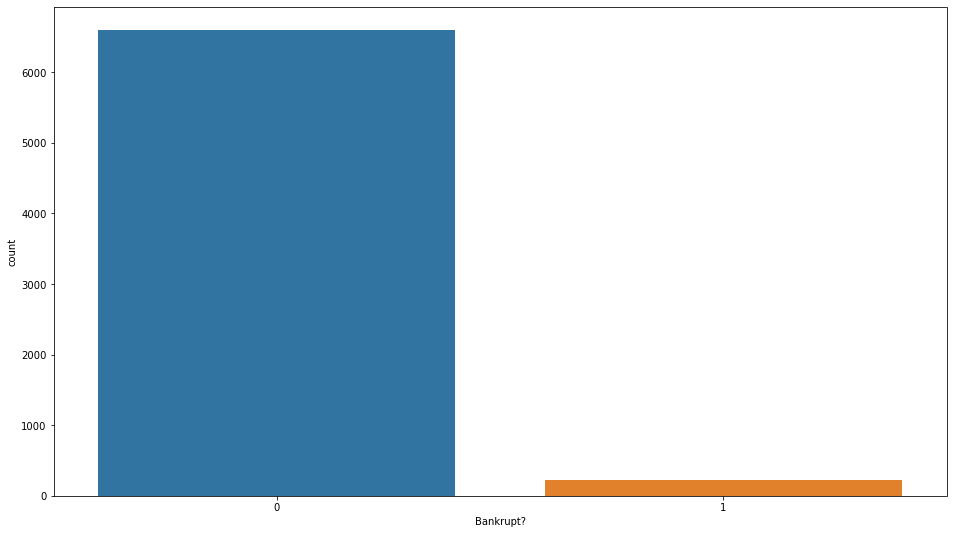

In [9]:
plt.figure(figsize=(16,9))
sns.countplot(x = 'Bankrupt?',data = df)
plt.show()

In [10]:
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

**This is clearly the case of Imbalanced data(it is biased) so I have to first balance it out**

# Handling the imbalanced data

In [14]:
from sklearn.utils import resample

#create two different dataframe of majority and minority class 
df_majority = df[(df['Bankrupt?']==0)] 
df_minority = df[(df['Bankrupt?']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 6599, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_new = pd.concat([df_minority_upsampled, df_majority])

In [15]:
df_new

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
1949,1,0.233852,0.331825,0.333423,0.627106,0.627106,0.998808,0.797152,0.809149,0.303445,...,0.650285,0.000141,0.623740,0.627103,0.829689,0.278307,0.026791,0.565158,1,0.036927
4154,1,0.451031,0.508341,0.498581,0.600016,0.600412,0.998994,0.797335,0.809264,0.303377,...,0.779217,0.001804,0.623675,0.600014,0.837164,0.292846,0.026518,0.563406,1,0.015561
1864,1,0.448789,0.508068,0.499706,0.602099,0.602099,0.998942,0.797297,0.809229,0.303420,...,0.778877,0.000772,0.623349,0.602094,0.836233,0.300209,0.026522,0.563438,1,0.014024
106,1,0.470677,0.536906,0.523850,0.597652,0.597652,0.999010,0.797386,0.809313,0.303433,...,0.796483,0.061290,0.626621,0.597654,0.840114,0.287760,0.035700,0.569663,1,0.017633
1953,1,0.448204,0.508395,0.494245,0.599367,0.599367,0.998965,0.797325,0.809244,0.303420,...,0.773099,0.004535,0.623763,0.599369,0.838183,0.279784,0.026398,0.562174,1,0.029203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [16]:
#display new class counts
df_new['Bankrupt?'].value_counts()

0    6599
1    6599
Name: Bankrupt?, dtype: int64

**Now the data is balanced and we are ready to move forward**

# Feature Selection

In [17]:
#defining dependent and independent variables
X = df_new.drop('Bankrupt?', axis=1)
y = df_new['Bankrupt?']

In [20]:
#splitting data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9238, 95), (3960, 95), (9238,), (3960,))

In [21]:
X_train

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
5401,0.537854,0.591910,0.574549,0.604729,0.604715,0.999050,0.797573,0.809436,0.303676,0.781705,...,0.826167,0.000759,0.623759,0.604727,0.844544,0.289540,0.026840,0.565380,1,0.016747
1442,0.498903,0.566670,0.559987,0.603151,0.603151,0.999019,0.797448,0.809387,0.303520,0.781625,...,0.810075,0.005414,0.622915,0.603148,0.841679,0.284778,0.027549,0.567263,1,0.019819
2909,0.472188,0.517335,0.504470,0.601299,0.601299,0.998970,0.797385,0.809288,0.303515,0.781544,...,0.785071,0.000334,0.623791,0.601297,0.838588,0.287314,0.027857,0.567689,1,0.017895
4021,0.464437,0.539522,0.513304,0.637167,0.637167,0.998833,0.797484,0.809405,0.303975,0.781433,...,0.801277,0.000964,0.624058,0.637167,0.840306,0.275253,0.026795,0.565177,1,0.179601
1753,0.201969,0.200720,0.228652,0.590914,0.590914,0.998625,0.796846,0.808804,0.303294,0.781065,...,0.514453,0.002026,0.623737,0.590912,0.802162,0.287458,0.026782,0.565116,1,0.017808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6744,0.530785,0.588803,0.568874,0.631855,0.633434,0.999373,0.797860,0.809641,0.303501,0.781890,...,0.830814,0.004248,0.625029,0.631855,0.841813,0.275394,0.026791,0.565159,1,0.145970
105,0.504363,0.562255,0.555330,0.604859,0.604859,0.999060,0.797438,0.809347,0.303419,0.781608,...,0.805041,0.001932,0.623060,0.604856,0.841229,0.286906,0.027821,0.567646,1,0.018150
3416,0.514795,0.578936,0.562129,0.601969,0.602084,0.999028,0.797471,0.809378,0.303544,0.781641,...,0.824876,0.000502,0.624378,0.601968,0.841877,0.277215,0.026795,0.565176,1,0.048435
4383,0.471555,0.572176,0.524493,0.594344,0.594258,0.998915,0.797434,0.809357,0.303716,0.781563,...,0.815758,0.071468,0.623752,0.594343,0.842970,0.289374,0.027147,0.566428,1,0.016820


# Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
minmax = MinMaxScaler(feature_range=(0, 1))

X_train = minmax.fit_transform(X_train)
X_test = minmax.transform(X_test)

In [26]:
X_train

array([[0.65750894, 0.60108503, 0.69778934, ..., 0.47505492, 0.        ,
        0.012851  ],
       [0.60989273, 0.57545394, 0.68010403, ..., 0.47732992, 0.        ,
        0.0159355 ],
       [0.5772348 , 0.5253543 , 0.6126788 , ..., 0.47784444, 0.        ,
        0.01400381],
       ...,
       [0.62932062, 0.58790965, 0.68270481, ..., 0.47480894, 0.        ,
        0.04466547],
       [0.57646007, 0.58104517, 0.6369961 , ..., 0.47632069, 0.        ,
        0.012925  ],
       [0.5738975 , 0.5476085 , 0.63992198, ..., 0.47996091, 0.        ,
        0.0241669 ]])

# Modelling - Applying the Algos

## Logistic Regression

In [55]:
#training model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 10000)
lr.fit(X_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
lr_acc = accuracy_score(y_test,y_pred)
print('\nAccuracy score = ',round(lr_acc*100,2),'%')

confusion matrix:
 [[1751  289]
 [ 200 1720]]

Accuracy score =  87.65 %


## KNN Classifier

In [58]:
#training model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',p = 2)
knn.fit(X_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
knn_acc = accuracy_score(y_test,y_pred)
print('\nAccuracy score = ',round(knn_acc*100,2),'%')

confusion matrix:
 [[1896  144]
 [   0 1920]]

Accuracy score =  96.36 %


## SVM Classifier

In [43]:
#training model
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf')
svc.fit(X_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = svc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
svc_acc = accuracy_score(y_test,y_pred)
print('\nAccuracy score = ',round(svc_acc*100,2),'%')

confusion matrix:
 [[1762  278]
 [ 144 1776]]

Accuracy score =  89.34 %


## Naive Bayes Classifier

In [45]:
#training model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = nb.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
nb_acc = accuracy_score(y_test,y_pred)
print('\nAccuracy score = ',round(nb_acc*100,2),'%')

confusion matrix:
 [[1626  414]
 [ 247 1673]]

Accuracy score =  83.31 %


## Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(X_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = dt.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
dt_acc = accuracy_score(y_test,y_pred)
print('\nAccuracy score = ',round(dt_acc*100,2),'%')

confusion matrix:
 [[1969   71]
 [   0 1920]]

Accuracy score =  98.21 %


## Random Forest Classifer

In [47]:
#training model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 60, criterion = 'entropy',random_state = 0)
rf.fit(X_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
rf_acc = accuracy_score(y_test,y_pred)
print('\nAccuracy score = ',round(rf_acc*100,2),'%')

confusion matrix:
 [[2008   32]
 [   0 1920]]

Accuracy score =  99.19 %


## XG Boost Classifier

In [52]:
#to ignore the warnings
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [54]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = xgb.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
xgb_acc = accuracy_score(y_test,y_pred)
print('\nAccuracy score = ',round(xgb_acc*100,2),'%')

[17:04:52] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion matrix:
 [[2012   28]
 [   0 1920]]

Accuracy score =  99.29 %


# PCA

In [1]:
from sklearn.decomposition import PCA
pca = PCA(0.99)
#X_train_p = pca.fit_transform(X_train)
#X_test_p = pca.transform(X_test)

In [78]:
X_train_p.shape,X_test_p.shape

((9238, 2), (3960, 2))

In [79]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_p, y_train)

LogisticRegression(random_state=0)

In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test_p)
cm = confusion_matrix(y_test, y_pred)
print(cm)
pca_acc = accuracy_score(y_test, y_pred)

[[1269  771]
 [ 829 1091]]


In [81]:
print("PCA Accuracy is: ",round(pca_acc*100,2),'%')

PCA Accuracy is:  59.6 %


**We find that Applying PCA doesn't increase the accuracy**

# K-FOLD CV

In [83]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 60.41 %


# Comparing The Accuracies

Text(0.5, 1.0, 'Plotting the Model Accuracies')

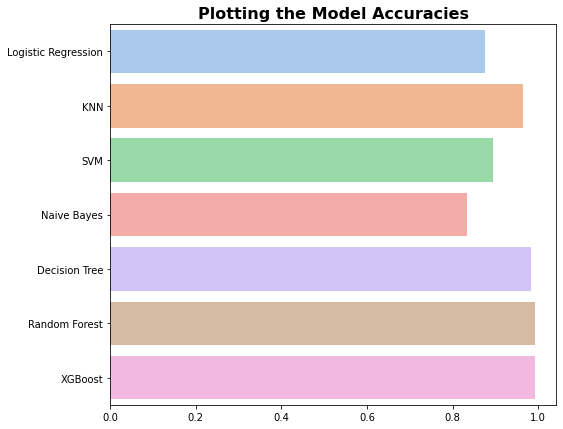

In [63]:
#comparing accuracies
plt.figure(figsize= (8,7))
ac = [lr_acc,knn_acc,svc_acc,nb_acc,dt_acc,rf_acc,xgb_acc]
name = ['Logistic Regression','KNN','SVM','Naive Bayes','Decision Tree', 'Random Forest','XGBoost']
sns.barplot(x = ac,y = name,palette='pastel')
plt.title("Plotting the Model Accuracies", fontsize=16, fontweight="bold")

In [85]:
#Conclusion
print('Accuracy for logistic regression is: ',round(lr_acc*100,2),'%')
print('Accuracy for knn Classifier is: ',round(knn_acc*100,2),'%')
print('Accuracy for Support Vector Classifier is: ',round(svc_acc*100,2),'%')
print('Accuracy for Naive Bayes Classifier is: ',round(nb_acc*100,2),'%')
print('Accuracy for DT Classifier is: ',round(dt_acc*100,2),'%')
print('Accuracy for Random Forest Classifier is: ',round(rf_acc*100,2),'%')
print('Accuracy for XGBoost Classifier is: ',round(xgb_acc*100,2),'%')

print('\nAfter Applying PCA')
print('The Accuracy for logistic Changes to: ',round(pca_acc*100,2),'%')

Accuracy for logistic regression is:  87.65 %
Accuracy for knn Classifier is:  96.36 %
Accuracy for Support Vector Classifier is:  89.34 %
Accuracy for Naive Bayes Classifier is:  83.31 %
Accuracy for DT Classifier is:  98.21 %
Accuracy for Random Forest Classifier is:  99.19 %
Accuracy for XGBoost Classifier is:  99.29 %

After Applying PCA
The Accuracy for logistic Changes to:  59.6 %


**So, It is found that XGBoost gives the best accuracy among all the Algorithm**